# **Task 4**

## **Exploratory Data Analysis - Terrorism**


* In this task, "Exploratory Data Analysis" was performed on the "Global Terrorism" dataset.
### Problems
* Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
* As a security/defense analyst, try to find out the hot zone of terrorism.
* What all security issues and insights you can derive by EDA? 
### GRIP THE SPARKS FOUNDATION ###
# Author: Muhammet Varlı

## **1. The Story of the Dataset**
### **Information about some variables used in the Data Set.**
For detailed information about the data set: https://www.start.umd.edu/gtd/downloads/Codebook.pdf
* iyear: This field contains the year in which the incident occurred.
* imonth: This field contains the month in which the incident occurred.
* iday: This field contains the day in which the incident occurred.
* country_txt: This field identifies the country or location where the incident occurred (categorical)
* region_txt: This field identifies the region in which the incident occurred(categorical)
* provstate: This variable records the name (at the time of event) of the 1st order subnational administrative region in which the event occurs.
* city: This field contains the name of the city, village, or town in which the incident occurred
* latitude: This field records the latitude (based on WGS1984 standards) of the city in which the event occurred.
* longitude: This field records the longitude (based on WGS1984 standards) of the city in which the event occurred.
* attacktype1_txt: 1:Assassination 2:Hijacking 3:Kidnapping 4:Barricade Incident 5:Bombing/Explosion 6:Armed Assault 7:Unarmed Assault 8:Facility/Infrastructure Attack 9:Unknown
* targtype1_txt: The target/victim type field captures the general type of target/victim. This variable consists of the following 22 categories.
* target1: This is the specific person, building, installation, etc., that was targeted and/or victimized and is a part of the entity named above.
* gname: This field contains the name of the group that carried out the attack.
* weaptype1_txt: Up to four weapon types are recorded for each incident
* nkill: This field stores the number of total confirmed fatalities for the incident.
* nwound: This field records the number of confirmed non-fatal injuries to both perpetrators and victims

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# conda install basemap

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\win10\Anaconda3\envs\tensorflow

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |     pyhd3eb1b0_3         155 KB
    freetype-2.10.4            |       hd328e21_0         466 KB
    kiwisolver-1.3.0           |   py37hd77b12b_0          52 KB
    libtiff-4.1.0              |       h56a325e_1         739 KB
    lz4-c-1.9.2                |       hf4a77e7_3         106 KB
    matplotlib-base-3.3.2      |   py37hba9282a_0         5.1 MB
    pillow-8.0.1               |   py37h4fa10fc_0         662 KB
    tk-8.6.1

In [2]:
# Some Libraries Imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display

## **2. Data Read**

In [3]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding="latin-1")
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[1]+1)
# Let's have an overview of the data set
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


* Some features have been renamed their names for clarity.

In [4]:
df=df.rename(columns={"provstate": "State","region_txt": "Region","country_txt": "Country",
                      "iyear": "Year","imonth": "Month","iday": "Day",
                      "attacktype1_txt": "Attack_Type","nkill": "Killed",
                      "nwound": "Wounded","targtype1_txt": "Target_Type","weaptype1_txt": "Weap_Type",
                      "gname": "Group_Name","target1": "Target_Name"})

* Selection of only necessary features.

In [5]:
df = df[['State', 'Region', 'city', 'latitude', 'longitude','Country',
         'Attack_Type','Year','Month','Day','Killed', 'Wounded', 'Target_Type',
         'Group_Name', 'Target_Name','Weap_Type']]

df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['Affected']=df['Killed']+df['Wounded']
# Let's have an overview of the data set
df.head()

State                       Region           city   latitude   longitude  \
0      NaN  Central America & Caribbean  Santo Domingo  18.456792  -69.951164   
1  Federal                North America    Mexico city  19.371887  -99.086624   
2   Tarlac               Southeast Asia        Unknown  15.478598  120.599741   
3   Attica               Western Europe         Athens  37.997490   23.762728   
4  Fukouka                    East Asia        Fukouka  33.580412  130.396361   

              Country                     Attack_Type  Year  Month  Day  \
0  Dominican Republic                   Assassination  1970      7    2   
1              Mexico     Hostage Taking (Kidnapping)  1970      0    0   
2         Philippines                   Assassination  1970      1    0   
3              Greece               Bombing/Explosion  1970      1    0   
4               Japan  Facility/Infrastructure Attack  1970      1    0   

   Killed  Wounded                  Target_Type  \
0       1        0  Private Citizens & Property   
1       0        0      Government (Diplomatic)   
2       1        0          Journalists & Media   
3       0        0      Government (Diplomatic)   
4       0        0      Government (Diplomatic)   

                           Group_Name              Target_Name   Weap_Type  \
0                              MANO-D             Julio Guzman     Unknown   
1  23rd of September Communist League  Nadine Chaval, daughter     Unknown   
2                             Unknown                 Employee     Unknown   
3                             Unknown             U.S. Embassy  Explosives   
4                             Unknown           U.S. Consulate  Incendiary   

   Affected  
0         1  
1         0  
2         1  
3         0  
4         0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
State          181270 non-null object
Region         181691 non-null object
city           181257 non-null object
latitude       177135 non-null float64
longitude      177134 non-null float64
Country        181691 non-null object
Attack_Type    181691 non-null object
Year           181691 non-null int64
Month          181691 non-null int64
Day            181691 non-null int64
Killed         181691 non-null int32
Wounded        181691 non-null int32
Target_Type    181691 non-null object
Group_Name     181691 non-null object
Target_Name    181055 non-null object
Weap_Type      181691 non-null object
Affected       181691 non-null int32
dtypes: float64(2), int32(3), int64(3), object(9)
memory usage: 21.5+ MB


In [7]:
df.describe().T

count         mean            std           min          25%  \
latitude   177135.0    23.498343      18.569242 -5.315461e+01    11.510046   
longitude  177134.0  -458.695653  204778.988611 -8.618590e+07     4.545640   
Year       181691.0  2002.638997      13.259430  1.970000e+03  1991.000000   
Month      181691.0     6.467277       3.388303  0.000000e+00     4.000000   
Day        181691.0    15.505644       8.814045  0.000000e+00     8.000000   
Killed     181691.0     2.266860      11.227057  0.000000e+00     0.000000   
Wounded    181691.0     2.883291      34.309746  0.000000e+00     0.000000   
Affected   181691.0     5.150151      40.555414  0.000000e+00     0.000000   

                   50%          75%          max  
latitude     31.467463    34.685087    74.633553  
longitude    43.246506    68.710327   179.366667  
Year       2009.000000  2014.000000  2017.000000  
Month         6.000000     9.000000    12.000000  
Day          15.000000    23.000000    31.000000  
Killed        0.000000     2.000000  1570.000000  
Wounded       0.000000     2.000000  8191.000000  
Affected      1.000000     4.000000  9574.000000

* It shows the correlation matrix of the data set.

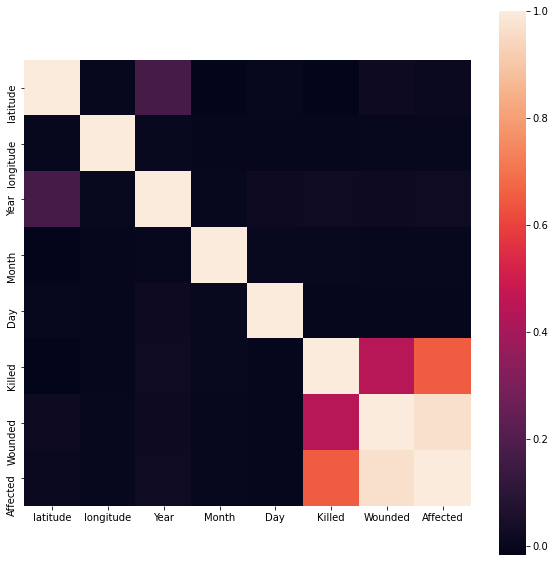

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [9]:
#Percentage of NAN Values 
per_Nan = [(c, df[c].isna().mean()*100) for c in df]
per_Nan = pd.DataFrame(per_Nan, columns=["column_name", "Percentage"])

In [10]:
per_Nan

column_name  Percentage
0         State    0.231712
1        Region    0.000000
2          city    0.238867
3      latitude    2.507554
4     longitude    2.508104
5       Country    0.000000
6   Attack_Type    0.000000
7          Year    0.000000
8         Month    0.000000
9           Day    0.000000
10       Killed    0.000000
11      Wounded    0.000000
12  Target_Type    0.000000
13   Group_Name    0.000000
14  Target_Name    0.350045
15    Weap_Type    0.000000
16     Affected    0.000000

* We observe the number of affected people, which is the sum of deaths, injuries, and deaths and injuries due to terrorism by region.

In [11]:
# Death, Wounded and Affected by Region
number_of_affected = df[['Region','Killed','Wounded','Affected']]
number_of_affected = number_of_affected.groupby(by=['Region']).sum().reset_index().sort_values(by=['Affected'], ascending = False)
number_of_affected

Region  Killed  Wounded  Affected
5    Middle East & North Africa  137642   214308    351950
8                    South Asia  101319   141360    242679
10           Sub-Saharan Africa   78386    52856    131242
7                 South America   28849    16704     45553
9                Southeast Asia   15637    26259     41896
1   Central America & Caribbean   28708     8991     37699
6                 North America    4916    21531     26447
11               Western Europe    6694    18332     25026
4                Eastern Europe    7415    12045     19460
3                     East Asia    1152     9213     10365
2                  Central Asia    1000     2009      3009
0         Australasia & Oceania     150      260       410

* List the 20 countries most affected by terrorism.

In [12]:
# Death, Wounded and Affected by Country(top 20)
affected_country = df[['Country','Killed','Wounded','Affected']]
affected_country = affected_country.groupby(by=['Country']).sum().reset_index().sort_values(by=['Affected'], ascending = False)
affected_country[:20]

Country  Killed  Wounded  Affected
84            Iraq   78589   134690    213279
0      Afghanistan   39384    44277     83661
134       Pakistan   23822    42038     65860
80           India   19341    28980     48321
130        Nigeria   22682    10238     32920
167      Sri Lanka   15530    15561     31091
175          Syria   15229    14109     29338
35        Colombia   14698    10328     25026
189  United States    3771    20702     24473
140    Philippines    9559    13367     22926
2          Algeria   11066     9150     20216
159        Somalia   10273     8875     19148
200          Yemen    8776     9328     18104
52     El Salvador   12053     5062     17115
139           Peru   12771     4078     16849
183         Turkey    6888     9899     16787
99         Lebanon    4061    10904     14965
128      Nicaragua   10598     1731     12329
147         Russia    4308     7441     11749
179       Thailand    2742     7818     10560

## **3. Data Visualization**

### Global Terror Attacks

* The numbers of terrorist attacks by years are shown.

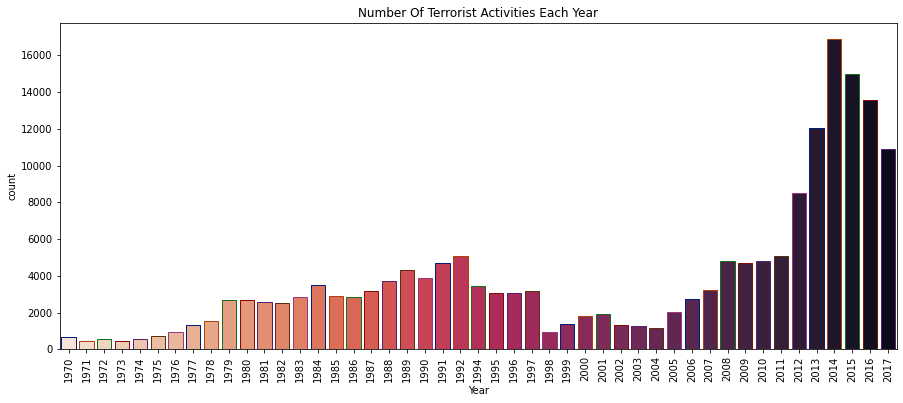

In [13]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=df,palette='rocket_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

* The locations of terrorist incidents around the world are shown on the world map with dots.
* It includes all terrorist incidents that took place between 1970 and 2017 on the map.

In [14]:
regions = list(set(df.Region))
colors = ['yellow', 'red', 'lime','fuchsia', 'purple', 'green', 'orange', 'brown',\
          'aqua','purple', 'black', 'lightgreen']


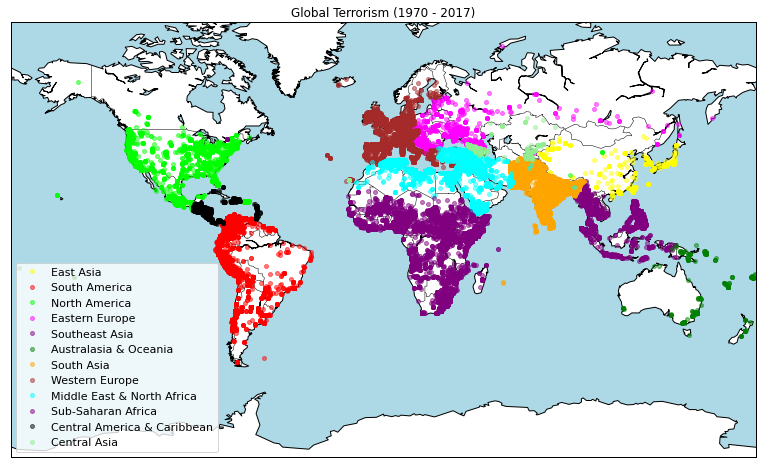

In [15]:
plt.figure(figsize=(15,8))
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='white',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')

def pltpoints(region, color = None, label = None):
    x, y = m(list(df.longitude[df.Region == region].astype("float")),\
            (list(df.latitude[df.Region == region].astype("float"))))
    points = m.plot(x, y, "o", markersize = 4, color = color, label = label, alpha = .5)
    return(points)

for i, region in enumerate(regions):
    pltpoints(region, color = colors[i], label = region)  
    
plt.title("Global Terrorism (1970 - 2017)")
plt.legend(loc ='lower left', prop= {'size':11})
plt.show()    

## **Animation Of Terrorist Activities**

* An animated representation of the terrorist attacks that took place around the world between 1970 and 2017.


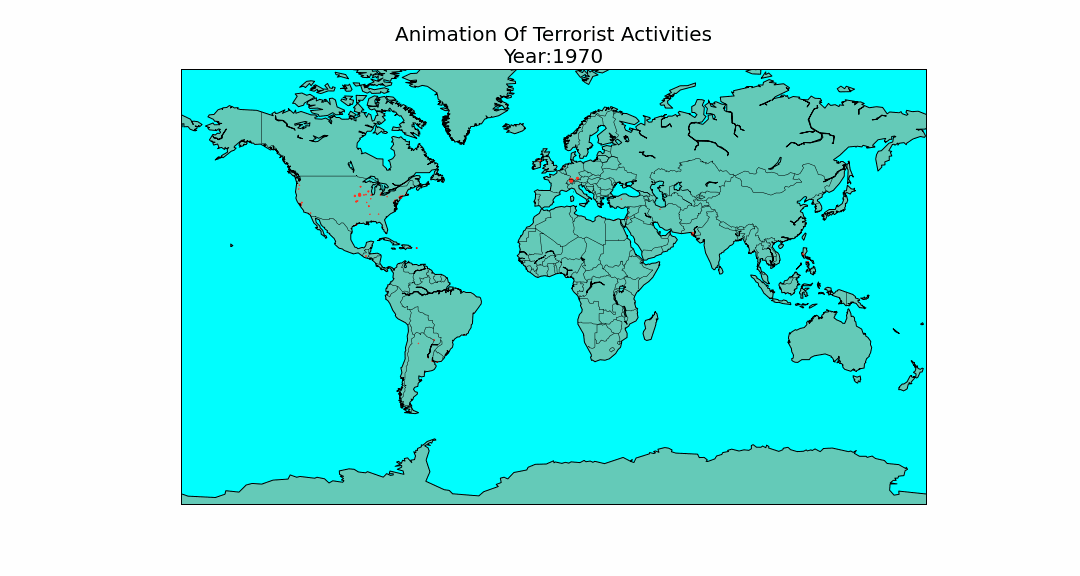

In [115]:
fig = plt.figure(figsize=(15,8))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year),fontsize=20)
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(df[df['Year']==Year].latitude)
    long6=list(df[df['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(Killed+Wounded)*0.3 for Killed,Wounded in zip(df[df['Year']==Year].Killed,df[df['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(color='coral',lake_color='aqua', zorder = 1,alpha=0.4)
    m6.drawmapboundary(fill_color='aqua')
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(df.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='pillow', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

In [16]:
df['Killed'].sum()

411868

* As can be seen in the chart, the region with the highest terrorist incidents is the Middle East & North Africa.

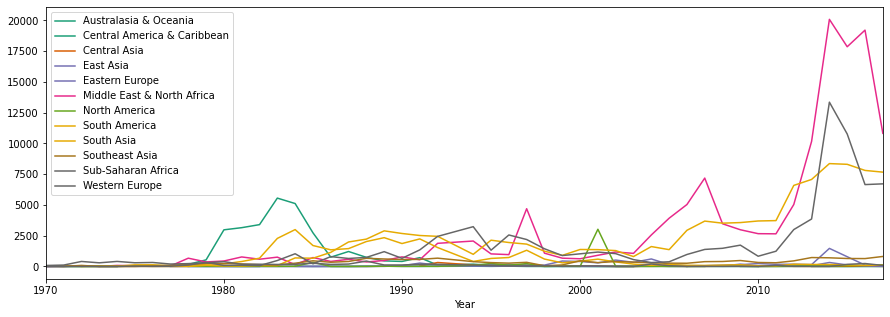

In [117]:
pd.pivot_table(data=df, index=df.Year, columns='Region', values='Killed', aggfunc='sum')\
    .plot.line(figsize=(15,5), colormap='Dark2').legend(title=None)

* As can be seen in the graph, the country with the highest number of terrorist incidents is observed as Iraq.

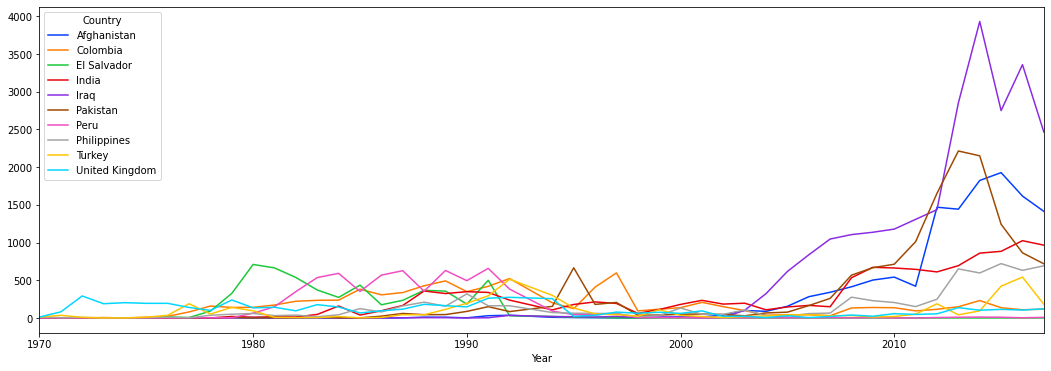

In [118]:
top_country_10=df[df['Country'].isin(df['Country'].value_counts()[:10].index)]
pd.crosstab(top_country_10.Year,top_country_10.Country).plot(color=sns.color_palette('bright',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

* Top Countries affected by Terror Attacks

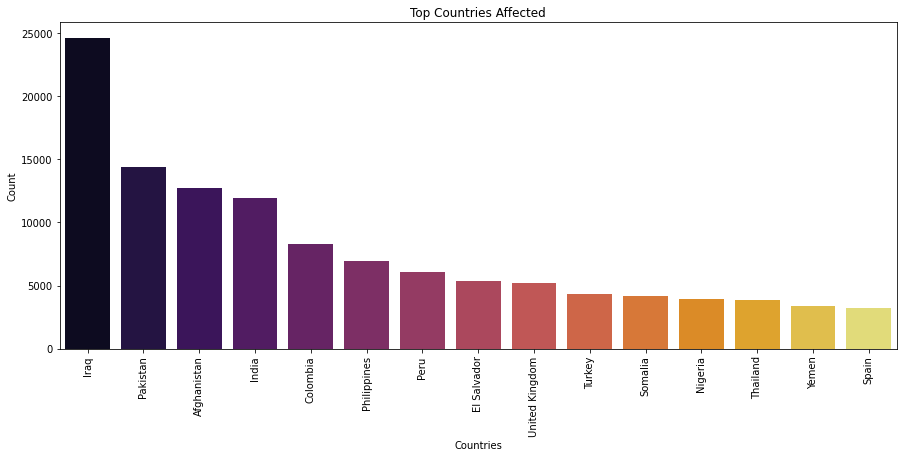

In [119]:
plt.subplots(figsize=(15,6))
sns.barplot(df['Country'].value_counts()[:15].index,df['Country'].value_counts()[:15].values,palette='inferno')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

* Attacks vs Killed

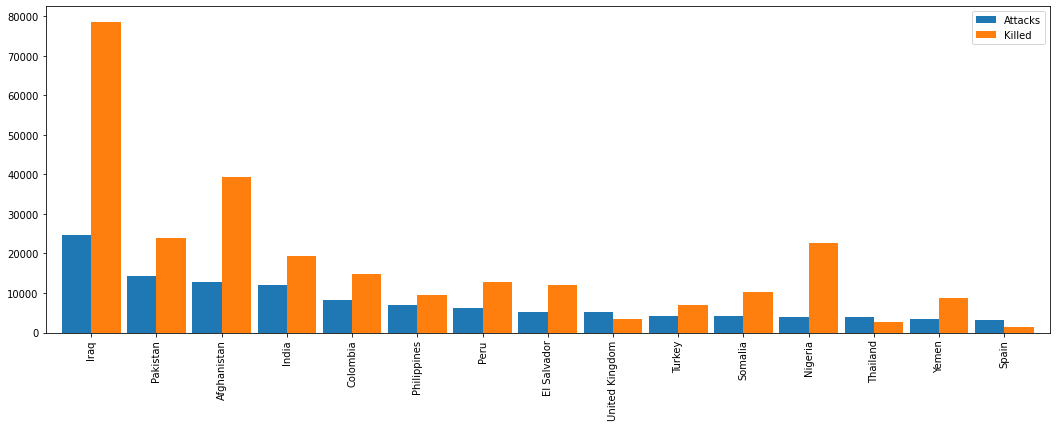

In [120]:
count_terror=df['Country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=df.groupby('Country')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

* Top Cities affected by Terror Attacks

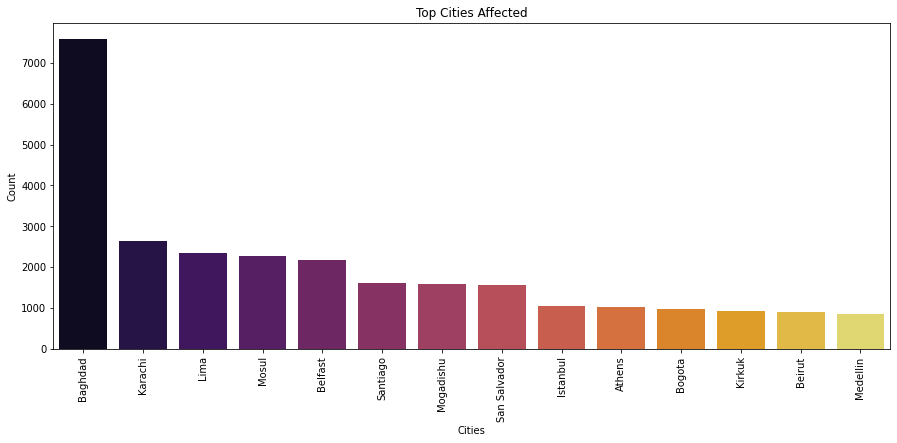

In [131]:
plt.subplots(figsize=(15,6))
sns.barplot(df['city'].value_counts()[1:15].index,df['city'].value_counts()[1:15].values,palette='inferno')
plt.title('Top Cities Affected')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

#### **Activity of Top Terrorist Groups**
* 'Unknown' is the most numerous group names in terrorist attacks, so you see the top 10 groups whose perpetrators are known.
* As can be seen in the graph, terrorist activities broke out after 2010 and it is seen that the majority of these terrorist attacks were carried out by ISIL.

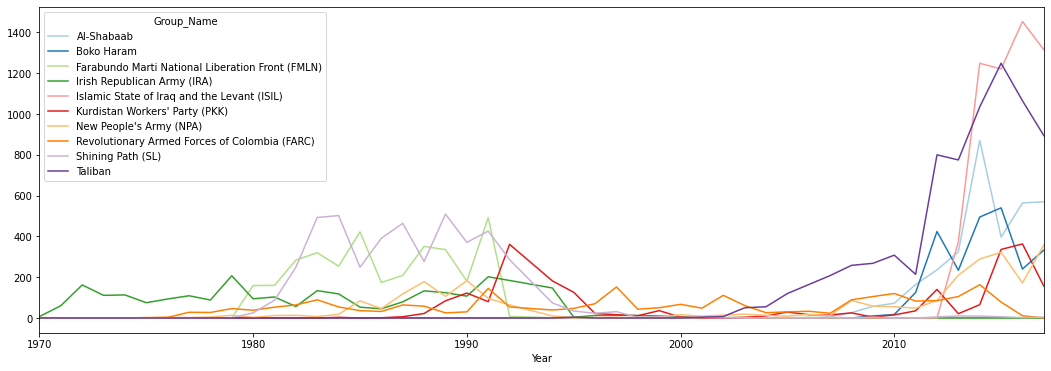

In [121]:
top_groups10=df[df['Group_Name'].isin(df['Group_Name'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group_Name).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

* Top 15 most active terrorist groups.

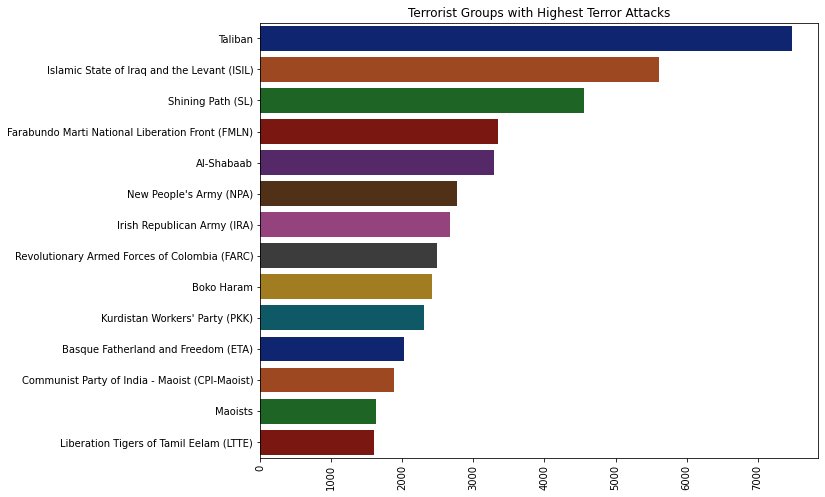

In [122]:
sns.barplot(df['Group_Name'].value_counts()[1:15].values,df['Group_Name'].value_counts()[1:15].index,palette=('dark'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

#### **Attack Type**

* The number of types of terrorist attacks in the world.

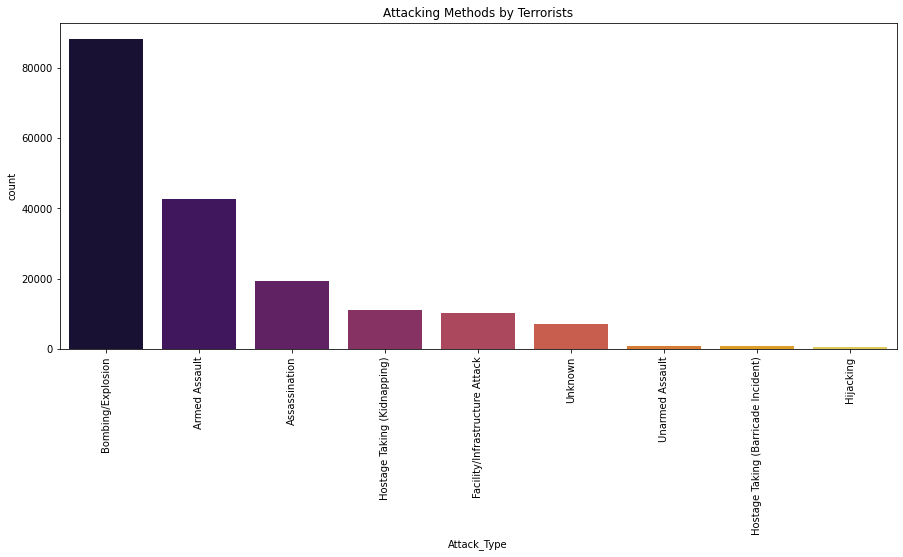

In [123]:
plt.subplots(figsize=(15,6))
sns.countplot('Attack_Type',data=df,palette='inferno',order=df['Attack_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

#### **AttackType vs Region**

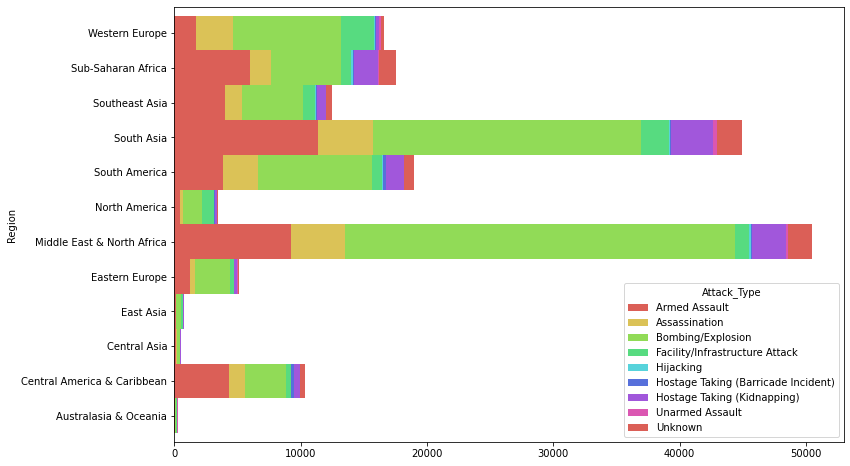

In [124]:
pd.crosstab(df.Region,df.Attack_Type).plot.barh(stacked=True,width=1,color=sns.color_palette('hls',8))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()


#### **Target Type** 

* The numbers of terrorist attacks carried out by target type are shown in the column chart below.

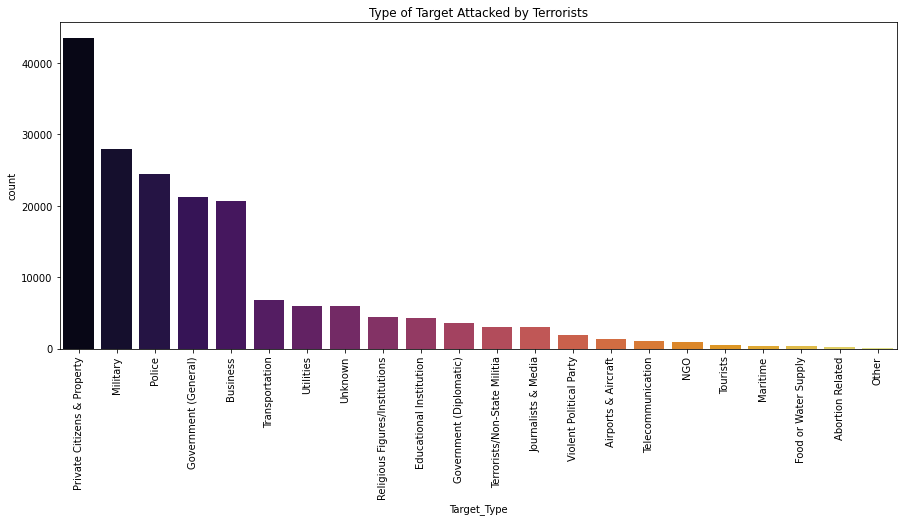

In [125]:
plt.subplots(figsize=(15,6))
sns.countplot('Target_Type',data=df,palette='inferno',order=df['Target_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Type of Target Attacked by Terrorists')
plt.show()

#### **Weapon Type** 

In [126]:
df["Weap_Type"].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

* The numbers of terrorist attacks carried out by weapon type are shown in the column chart below.

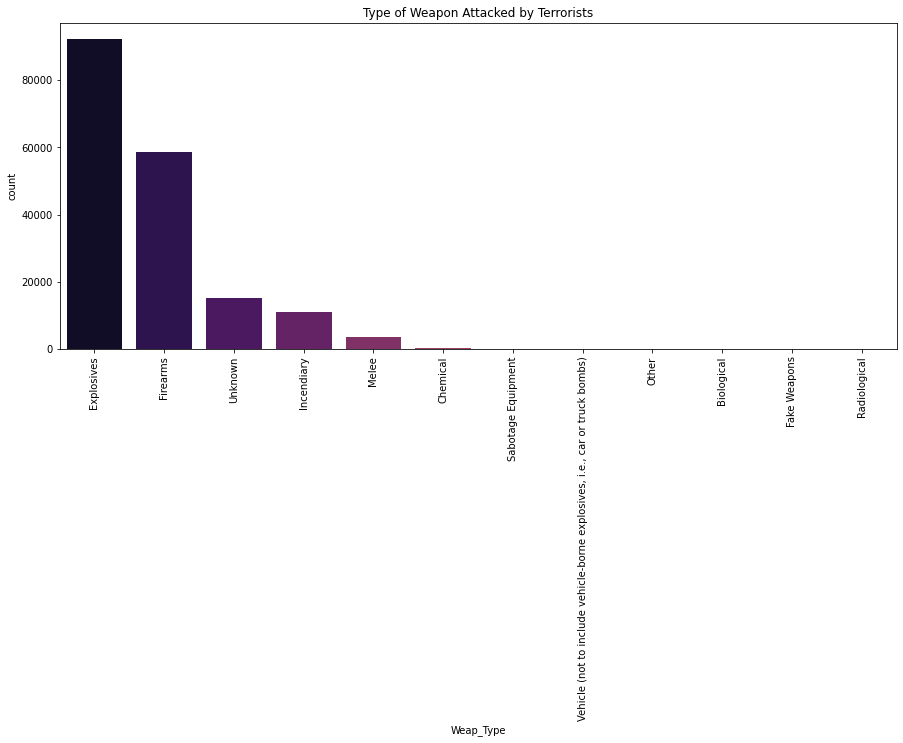

In [127]:
plt.subplots(figsize=(15,6))
sns.countplot('Weap_Type',data=df,palette='inferno',order=df['Weap_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Type of Weapon Attacked by Terrorists')
plt.show()

## **Results**

* Iraq has been observed as the hottest region of terrorism.
* The countries with the highest terrorism are listed as follows:
1. Iraq
2. Pakistan
3. Afghanistan 
4. India 
5. Colombia 
6. Philippines 
7. Peru 
8. El Salvador 
9. United Kingdom 
10. Turkey
* The most dangerous city because of terrorist attacks is Baghdad(Iraq).
* The cities with the most terrorist attacks are listed as follows:
1. Baghdad 
2. Karachi 
3. Lima 
4. Mosul 
5. Belfast
* Terrorist groups with the most terrorist activities are listed as follows:
1. Taliban
2. Islamic State of Iraq and the Levant (ISIL) 
3. Shining Path (SL) 
4. Farabundo Marti National Liberation Front (FMLN) 
5. Al-Shabaab 
6. New People's Army (NPA) 
7. Irish Republican Army (IRA) 
8. Revolutionary Armed Forces of Colombia (FARC) 
9. Boko Haram 
10. Kurdistan Workers' Party (PKK)
* The types of terrorist attacks are listed as follows:
1. Bombing / Explosion
2. Armed Assault 
3. Assassination 
4. Hostage Taking (Kidnapping) 
5. Facility / Infrastructure Attack
* The target types of terrorist attacks are as follows:
1. Private Citizens & Property
2. Military 
3. Police 
4. Government (General) 
5. Business
* The types of weapons used in terrorist attacks are listed as follows:
1. Explosives 
2. Firearms 
3. Unknown 
4. Incendiary 
5. Melee
* Especially in the 2010s, terrorist attacks peaked. Attacks have been decreasing in recent years, albeit slowly.
